In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
diamonds_train = pd.read_csv('outputs/df_train.csv')
diamonds_train_price = pd.read_csv('outputs/df_train_price.csv')
diamonds_predict=pd.read_csv('outputs/df_test.csv')
submit=pd.read_csv('inputs/sample_submission.csv')

In [3]:
diamonds_train.head()

,carat,cut_numeric,color_numeric,clarity_numeric,depth,table,x,y,z
0,-1.051355,-0.810564,0.352161,-0.033632,0.736126,-0.650176,-1.283716,-1.236438,-1.180531
1,-0.966764,0.982588,0.940769,-0.641579,0.596363,-1.097476,-1.132102,-1.080061,-1.039596
2,-0.839879,-0.810564,1.529377,-0.641579,-1.010919,2.033618,-0.918059,-0.854183,-0.969129
3,-0.839879,0.086012,-0.825055,0.574315,0.037308,0.781181,-0.900222,-0.862870,-0.870475
4,0.217504,-0.810564,1.529377,-0.641579,-0.521746,2.480917,0.330526,0.344710,0.271096


In [4]:
diamonds_predict.head()

,carat,cut_numeric,color_numeric,clarity_numeric,depth,table,x,y,z
0,3.267015,0.978152,-1.416151,-1.232414,-0.666318,-1.554540,2.620734,2.539800,2.446736
1,2.596725,0.978152,-0.830504,-1.232414,0.168508,-0.658049,2.175567,2.234832,2.230593
2,-0.608098,0.978152,-1.416151,-0.627731,-0.040199,-1.554540,-0.495431,-0.491942,-0.492811
3,-1.047976,0.978152,-1.416151,-0.627731,-0.318474,-0.658049,-1.261117,-1.263332,-1.285335
4,0.334497,-2.592365,-0.830504,-0.023048,4.899190,-0.658049,0.332578,0.216660,0.890505


# Split train and test

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(diamonds_train, diamonds_train_price, test_size=0.03)

In [6]:
X_train.head()

,carat,cut_numeric,color_numeric,clarity_numeric,depth,table,x,y,z
34266,-1.051355,0.086012,-0.236447,0.574315,-1.500091,0.691721,-1.239123,-1.175625,-1.321466
7579,-1.009060,0.982588,-0.236447,-0.641579,-0.172337,-1.097476,-1.185613,-1.123499,-1.152344
12613,-0.903321,-0.810564,-0.236447,-0.641579,-1.220564,-0.202877,-0.944814,-0.897621,-1.025503
23024,1.507510,-0.810564,0.940769,-1.249527,0.386717,2.033618,1.266965,1.326412,1.342200
3777,-0.501516,0.086012,1.529377,-0.033632,-0.451864,0.244422,-0.347277,-0.376363,-0.405390


In [7]:
y_test.shape

(1214, 1)

# BaggingRegressor

In [8]:
from sklearn.ensemble import BaggingRegressor

In [9]:
reg = BaggingRegressor(n_estimators=14)

In [10]:
reg.fit(X_train, y_train)

/home/must4in3/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_bagging.py:399: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


BaggingRegressor(base_estimator=None, bootstrap=True, bootstrap_features=False,
                 max_features=1.0, max_samples=1.0, n_estimators=14,
                 n_jobs=None, oob_score=False, random_state=None, verbose=0,
                 warm_start=False)

In [11]:
y_pred_BR= reg.predict(X_test)

In [12]:
y_test_BR = y_test.copy()
y_test_BR['y']= y_pred_BR

In [13]:
y_test_BR['Price-y'] = abs(y_test_BR['price']- y_test_BR['y'])
y_test_BR.describe()

,price,y,Price-y
count,1214.000000,1214.000000,1214.000000
mean,4000.829489,3974.632542,274.247583
std,4042.728394,3955.192456,474.004587
min,351.000000,384.142857,0.000000
25%,966.000000,973.357143,33.214286
50%,2524.500000,2520.892857,101.785714
75%,5259.000000,5289.285714,293.357143
max,18745.000000,17931.571429,4185.428571


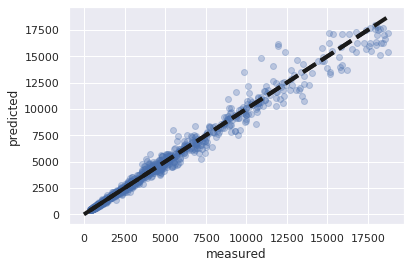

In [15]:
sns.set()
fig, ax = plt.subplots()
ax.scatter( y_test_BR['price'], y_test_BR['y'], alpha=.3)
ax.plot([y_test_BR.min(), y_test_BR.max()], [y_test_BR.min(), y_test_BR.max()], 'k--', lw=4)
ax.set_xlabel('measured')
ax.set_ylabel('predicted')
plt.show()

# Export

In [ ]:
df_y = pd.DataFrame(y_pred_BR)

In [ ]:
df_y['id'] = df_y.index

In [ ]:
df_y['price'] = df_y[0]

In [ ]:
df_y = df_y[['id', 'price']]

In [ ]:
df_y.to_csv('BaggingRegressor_nestimator_14.csv', index=False)

In [14]:
from sklearn.metrics import mean_squared_error, r2_score
print(f'RMSE={mean_squared_error(y_pred_BR, y_test)**0.5}')

RMSE=547.4550303837045
